# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [44]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [45]:
data = data.drop(columns='Unnamed: 0') # 의미 없는 열

In [46]:
print("shape : ",data.shape)
print("column unique null")
for i in data.columns:
    print(i,data[i].nunique(),data[i].isna().sum())
# 컬럼명, 유니크한 값 종류 수, null 개수

shape :  (6019, 13)
column unique null
Name 1876 0
Location 11 0
Year 22 0
Kilometers_Driven 3093 0
Fuel_Type 5 0
Transmission 2 0
Owner_Type 4 0
Mileage 442 2
Engine 146 36
Power 372 36
Seats 9 42
New_Price 540 5195
Price 1373 0


In [47]:
# new_price는 결측치가 대부분이라서 삭제
data = data.drop(columns='New_Price')

In [48]:
# name 종류가 너무 많아서 브랜드만 남김
data['Name'] = data['Name'].apply(lambda x : x.split(' ')[0])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [53]:
# 단위 제거
# 단위만 남겨놓음
data['unit'] = data['Mileage'].astype(str).apply(lambda x: x.split()[-1])
data['unit']

0       km/kg
1        kmpl
2        kmpl
3        kmpl
4        kmpl
        ...  
6014     kmpl
6015     kmpl
6016     kmpl
6017     kmpl
6018     kmpl
Name: unit, Length: 6019, dtype: object

In [55]:
# 숫자만 남겨놓음
data['Mileage_num'] = data['Mileage'].astype(str).apply(lambda x: float(x.split()[0]))
data['Mileage_num']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage_num, Length: 6019, dtype: float64

In [62]:
# 1 km/kg = 1.4* kmpl를 적용하여 숫자만 남김
data['Mileage'] = np.where(data['unit']=='km/kg', data['Mileage_num']*1.4, data['Mileage_num'])

In [66]:
data['Mileage'] # 위와 비교했을 때 0번째것(km/kg)만 바뀜

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

In [68]:
data = data.drop(columns=['Mileage_num','unit']) # 이제 안 쓰일 컬럼 제거

In [69]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74 bhp,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71 bhp,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 bhp,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1 bhp,5.0,2.65


In [67]:
data['Engine']  = data['Engine'].astype(str).apply(lambda x: float(x.split(' ')[0])) # CC 앞의 것만 남김

In [117]:

data['Power'] = data['Power'].astype(str).apply(lambda x: x.replace(" bhp",'')) # bhp 제거
data['Power'] = data['Power'].astype(str).apply(lambda x: x.replace("null",'')) # null 표기 제거

data['Power'] = pd.to_numeric(data['Power']) # 숫자형식으로 변경

In [119]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [118]:
# 결측치 제거해도 44개정도만 사라지길래 그냥 없앰
data.dropna(inplace=True)

In [78]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.287676,1621.606695,5.278828,9.501647
std,3.247238,9.155851e+04,4.823919,601.036987,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.260000,1198.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,46.956000,5998.000000,10.000000,160.000000


In [91]:
# distplot
df = data.groupby('Name')['Price'].mean()
label = data['Name'].unique()

'Maruti'

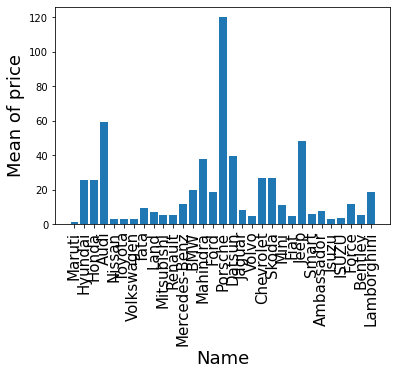

In [93]:
# 브랜드에 따른 가격 평균
plt.bar(np.arange(len(label)), df)

plt.xlabel('Name', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Name'>

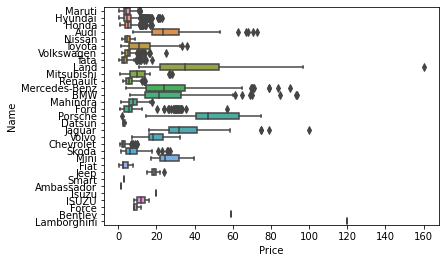

In [105]:
# 브랜드에 따른 가격 박스 플롯
sns.boxplot(y='Name',x='Price',data=data)

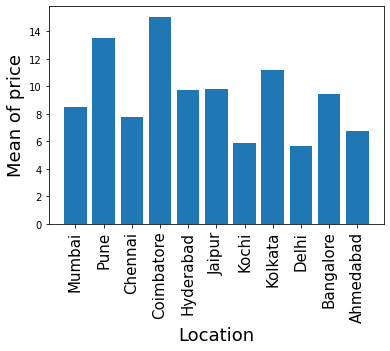

In [94]:
# 위치 따른 가격 평균
df = data.groupby('Location')['Price'].mean()
label = data['Location'].unique()

plt.bar(np.arange(len(label)), df)

plt.xlabel('Location', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Location'>

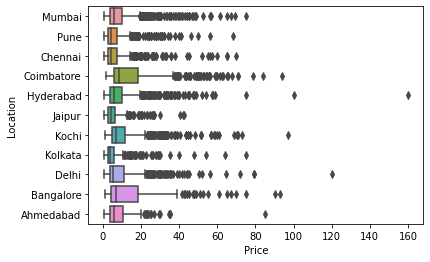

In [106]:
# 브랜드에 따른 가격 박스 플롯
sns.boxplot(y='Location',x='Price',data=data)

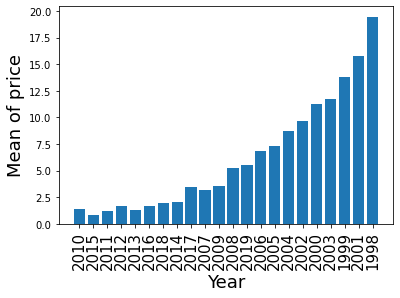

In [100]:
# 연도에 따른 가격 평균
df = data.groupby('Year')['Price'].mean()
label = data['Year'].unique()

plt.bar(np.arange(len(label)), df)

plt.xlabel('Year', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

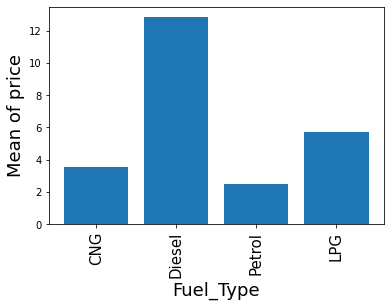

In [101]:
# 연료 종류에 따른 가격 평균
df = data.groupby('Fuel_Type')['Price'].mean()
label = data['Fuel_Type'].unique()

plt.bar(np.arange(len(label)), df)

plt.xlabel('Fuel_Type', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Fuel_Type'>

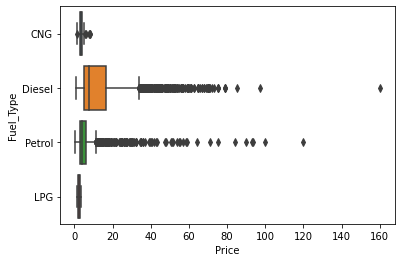

In [108]:
# 연료 종류에 따른 가격 박스플롯
sns.boxplot(y='Fuel_Type',x='Price',data=data)

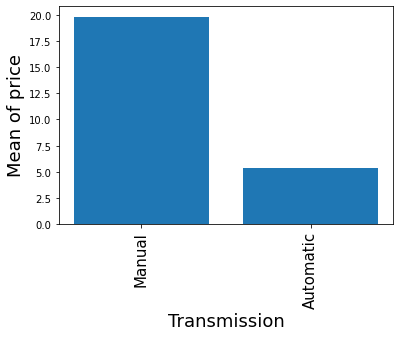

In [102]:
# 자동/수동에 따른 가격 평균
df = data.groupby('Transmission')['Price'].mean()
label = data['Transmission'].unique()

plt.bar(np.arange(len(label)), df)

plt.xlabel('Transmission', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Transmission'>

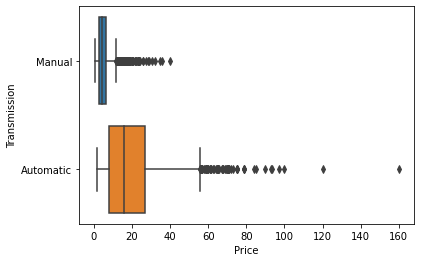

In [109]:
# 자동/수동에 따른 가격 박스플롯
sns.boxplot(y='Transmission',x='Price',data=data)

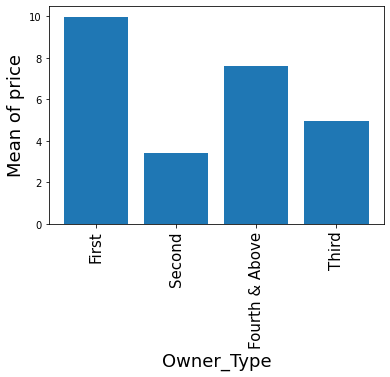

In [103]:
# owner type에 따른 가격 평균
df = data.groupby('Owner_Type')['Price'].mean()
label = data['Owner_Type'].unique()

plt.bar(np.arange(len(label)), df)

plt.xlabel('Owner_Type', fontsize=18)

plt.ylabel('Mean of price', fontsize=18)

plt.xticks(np.arange(len(label)), label, fontsize=15,rotation=90)

plt.show()

<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

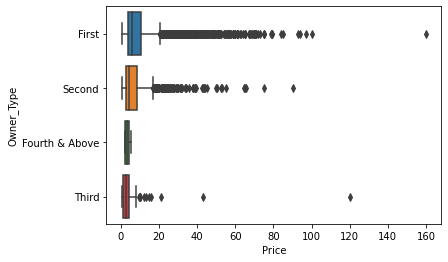

In [110]:
# owner type에 따른 가격 박스 플롯
sns.boxplot(y='Owner_Type',x='Price',data=data)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

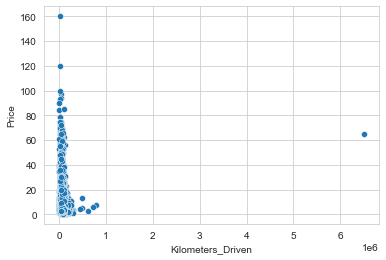

In [121]:
# 주행거리에 따른 가격 산점도
sns.set_style('whitegrid')
sns.scatterplot(data=data, x='Kilometers_Driven', y='Price')

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

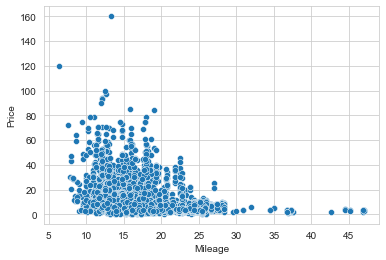

In [125]:
# Mileage에 따른 가격 산점도 그렸다가 0인 것은 이상한 값인듯하여 삭제한 후 산점도 그림
idx = data[data['Mileage']==0].index
idx
data.drop(idx, inplace=True)

sns.scatterplot(data=data, x='Mileage', y='Price')

<AxesSubplot:xlabel='Engine', ylabel='Price'>

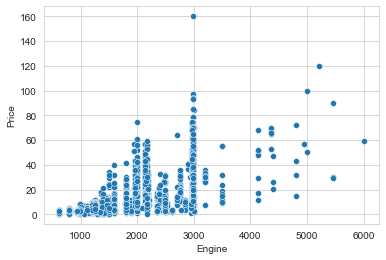

In [126]:
# Engine에 따른 가격 산점도
sns.scatterplot(data=data, x='Engine', y='Price')

<AxesSubplot:xlabel='Power', ylabel='Price'>

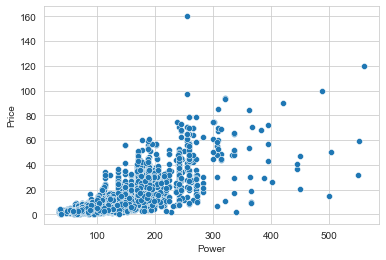

In [127]:
# Power에 따른 가격 산점도
sns.scatterplot(data=data, x='Power', y='Price')

<AxesSubplot:xlabel='Seats', ylabel='Price'>

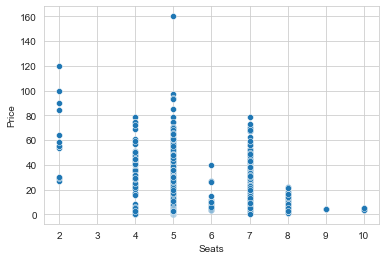

In [128]:
# Seats에 따른 가격 산점도
sns.scatterplot(data=data, x='Seats', y='Price')